In [34]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import os 
import random
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
def load_image(file_path):
    try:
        img = Image.open(file_path)
        return img
    except (IOError, SyntaxError) as e:
        print(f"Error loading image: {file_path}")
        return None

# Modify the code to handle unreadable images
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("Revitsone-5classes/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_path = os.path.join("Revitsone-5classes/other_activities", other)
        img = load_image(image_path)
        if img is not None:
            image_list_other.append(image_path)
            print(image_path)
            
for safe in os.listdir("Revitsone-5classes/safe_driving"):
    if safe.endswith(".png") or safe.endswith(".jpg"):
        image_path = os.path.join("Revitsone-5classes/safe_driving", safe)
        img = load_image(image_path)
        if img is not None:
            image_list_safe.append(image_path)
            print(image_path)
            
for talking in os.listdir("Revitsone-5classes/talking_phone"):
    if talking.endswith(".png") or talking.endswith(".jpg"):
        image_path = os.path.join("Revitsone-5classes/talking_phone", talking)
        img = load_image(image_path)
        if img is not None:
            image_list_talking.append(image_path)
            print(image_path)
            
for text in os.listdir("Revitsone-5classes/texting_phone"):
    if text.endswith(".png") or text.endswith(".jpg"):
        image_path = os.path.join("Revitsone-5classes/texting_phone", text)
        img = load_image(image_path)
        if img is not None:
            image_list_text.append(image_path)
            print(image_path)
            
for turn in os.listdir("Revitsone-5classes/turning"):
    if turn.endswith(".png") or turn.endswith(".jpg"):
        image_path = os.path.join("Revitsone-5classes/turning", turn)
        img = load_image(image_path)
        if img is not None:
            image_list_turn.append(image_path)
            print(image_path)

Revitsone-5classes/other_activities\2019-04-2416-05-13.png
Revitsone-5classes/other_activities\2019-04-2416-06-20.png
Revitsone-5classes/other_activities\2019-04-2416-06-37.png
Revitsone-5classes/other_activities\2019-04-2416-06-59.png
Revitsone-5classes/other_activities\2019-04-2416-07-58.png
Revitsone-5classes/other_activities\2019-04-2416-08-09.png
Revitsone-5classes/other_activities\2019-04-2416-08-22.png
Revitsone-5classes/other_activities\2019-04-2416-08-44.png
Revitsone-5classes/other_activities\2019-04-2416-33-00.png
Revitsone-5classes/other_activities\2019-04-2416-33-09.png
Revitsone-5classes/other_activities\2019-04-2416-33-19.png
Revitsone-5classes/other_activities\2019-04-2416-33-23.png
Revitsone-5classes/other_activities\2019-04-2416-33-48.png
Revitsone-5classes/other_activities\2019-04-2416-33-52.png
Revitsone-5classes/other_activities\2019-04-2416-34-05.png
Revitsone-5classes/other_activities\2019-04-2416-34-14.png
Revitsone-5classes/other_activities\2019-04-2416-36-40.p

In [3]:
# # define unreadable images and remove them from the list

# unreadable_images = []

# for image in image_list_other:
#     try:
#         img = Image.open(image)
#     except (IOError, SyntaxError) as e:
#         unreadable_images.append(image)
        
# for image in image_list_safe:
#     try:
#         img = Image.open(image)
#     except (IOError, SyntaxError) as e:
#         unreadable_images.append(image)
        
# for image in image_list_talking:
#     try:
#         img = Image.open(image)
#     except (IOError, SyntaxError) as e:
#         unreadable_images.append(image)
        
# for image in image_list_text:
#     try:
#         img = Image.open(image)
#     except (IOError, SyntaxError) as e:
#         unreadable_images.append(image)
        
# for image in image_list_turn:
#     try:
#         img = Image.open(image)
#         img.verify()
#     except (IOError, SyntaxError) as e:
#         unreadable_images.append(image)
        
# for unreadable_image in unreadable_images:
#     if unreadable_image in image_list_other:
#         image_list_other.remove(unreadable_image)
#     if unreadable_image in image_list_safe:
#         image_list_safe.remove(unreadable_image)
#     if unreadable_image in image_list_talking:
#         image_list_talking.remove(unreadable_image)
#     if unreadable_image in image_list_text:
#         image_list_text.remove(unreadable_image)
#     if unreadable_image in image_list_turn:
#         image_list_turn.remove(unreadable_image)

In [4]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2119
Number of samples in (Class = Safe Driving) =  2203
Number of samples in (Class = Talking Phone) =  2169
Number of samples in (Class = Texting Phone) =  2203
Number of samples in (Class = Turning) =  2057


In [5]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1589.25 423.8 105.95
1652.25 440.6 110.15
1626.75 433.8 108.45
1652.25 440.6 110.15
1542.75 411.40000000000003 102.85000000000001


In [6]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
1589 423 107
1652 440 111
1626 433 110
1652 440 111
1547 412 98


In [7]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [8]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [9]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [10]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [11]:
train_df.head()

,image,label
0,Revitsone-5classes/other_activities\2019-04-24...,Other
1,Revitsone-5classes/other_activities\2019-04-24...,Other
2,Revitsone-5classes/other_activities\2019-04-24...,Other
3,Revitsone-5classes/other_activities\2019-04-24...,Other
4,Revitsone-5classes/other_activities\2019-04-24...,Other


In [12]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  8066
Number of rows in test dataframe is:  2148
Number of rows in val dataframe is:  537


In [13]:
random_img_height = random.choice(train_other)

In [14]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


In [15]:
Batch_size = 64
Img_height = 240
Img_width = 240

In [16]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [17]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

Found 8066 validated image filenames belonging to 5 classes.
Found 2148 validated image filenames belonging to 5 classes.
Found 537 validated image filenames belonging to 5 classes.


In [18]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 58, 58, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 58, 58, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 256)       1024

In [19]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [21]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

Epoch 1/20


127/127 [==============================] - 122s 949ms/step - loss: 0.5019 - accuracy: 0.4043 - val_loss: 0.4749 - val_accuracy: 0.4004
Epoch 2/20
127/127 [==============================] - 116s 910ms/step - loss: 0.2918 - accuracy: 0.6780 - val_loss: 0.2834 - val_accuracy: 0.6760
Epoch 3/20
127/127 [==============================] - 114s 898ms/step - loss: 0.1942 - accuracy: 0.7938 - val_loss: 0.1909 - val_accuracy: 0.8082
Epoch 4/20
127/127 [==============================] - 113s 886ms/step - loss: 0.1176 - accuracy: 0.8884 - val_loss: 0.1370 - val_accuracy: 0.8696
Epoch 5/20
127/127 [==============================] - 108s 846ms/step - loss: 0.0871 - accuracy: 0.9173 - val_loss: 0.0951 - val_accuracy: 0.9218
Epoch 6/20
127/127 [==============================] - 118s 926ms/step - loss: 0.0764 - accuracy: 0.9297 - val_loss: 0.0999 - val_accuracy: 0.9236
Epoch 7/20
127/127 [==============================] - 112s 877ms/step - loss: 0.1101 - accuracy: 0.8972 - val_loss: 0.1264

In [22]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

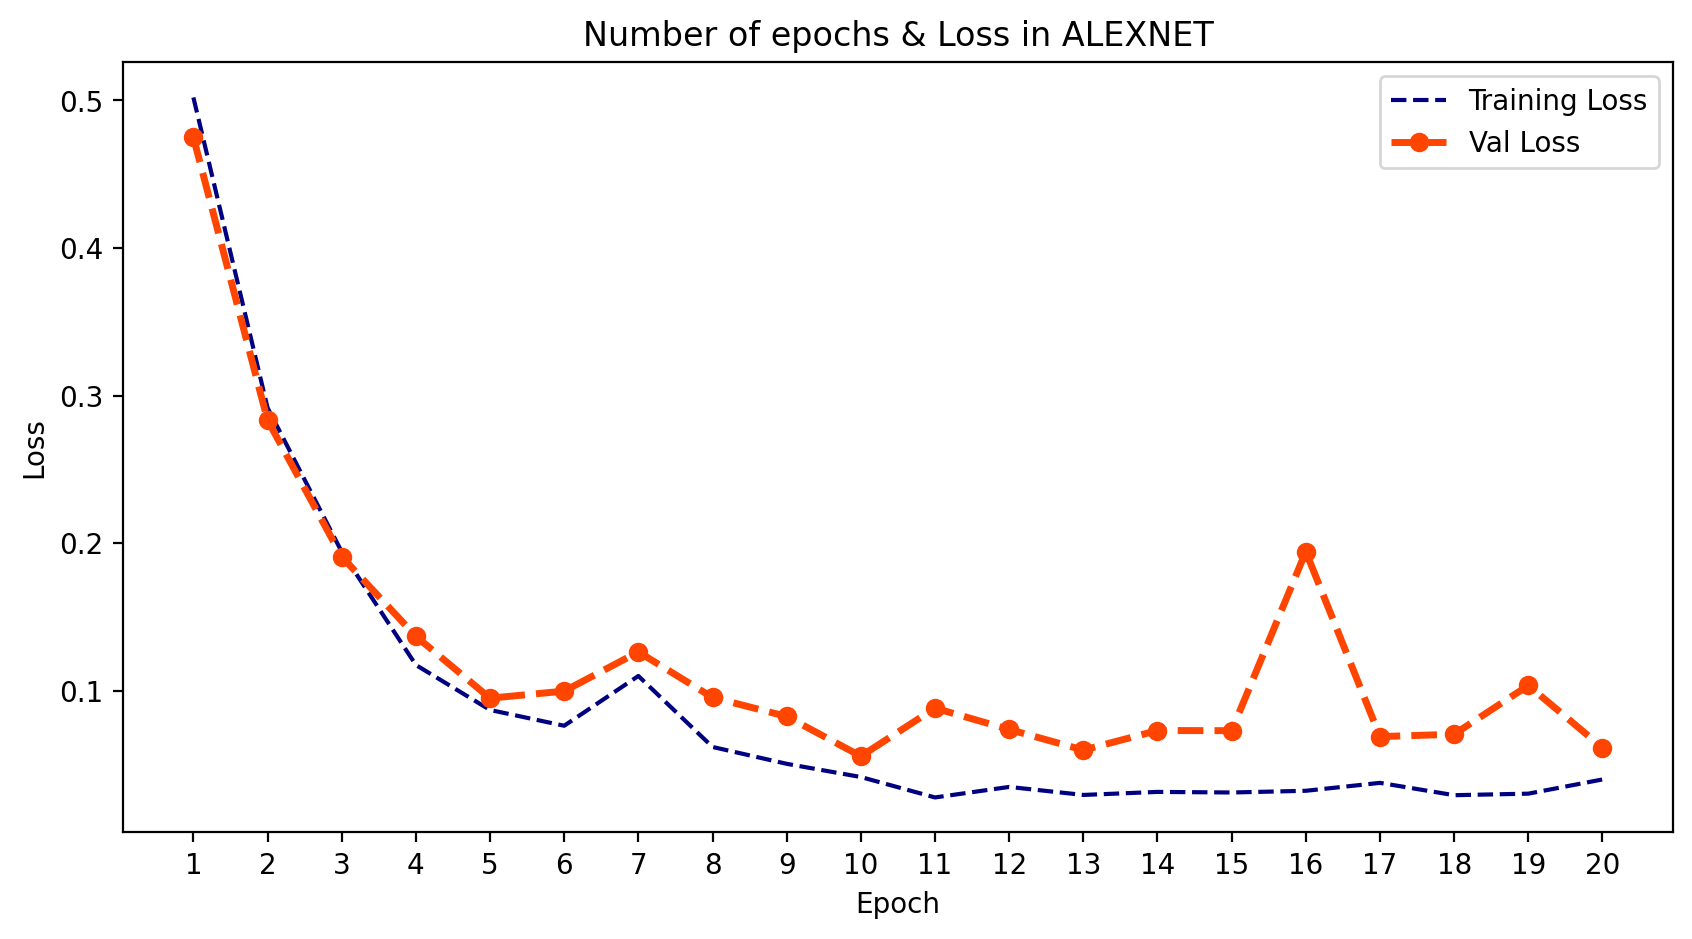

In [23]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

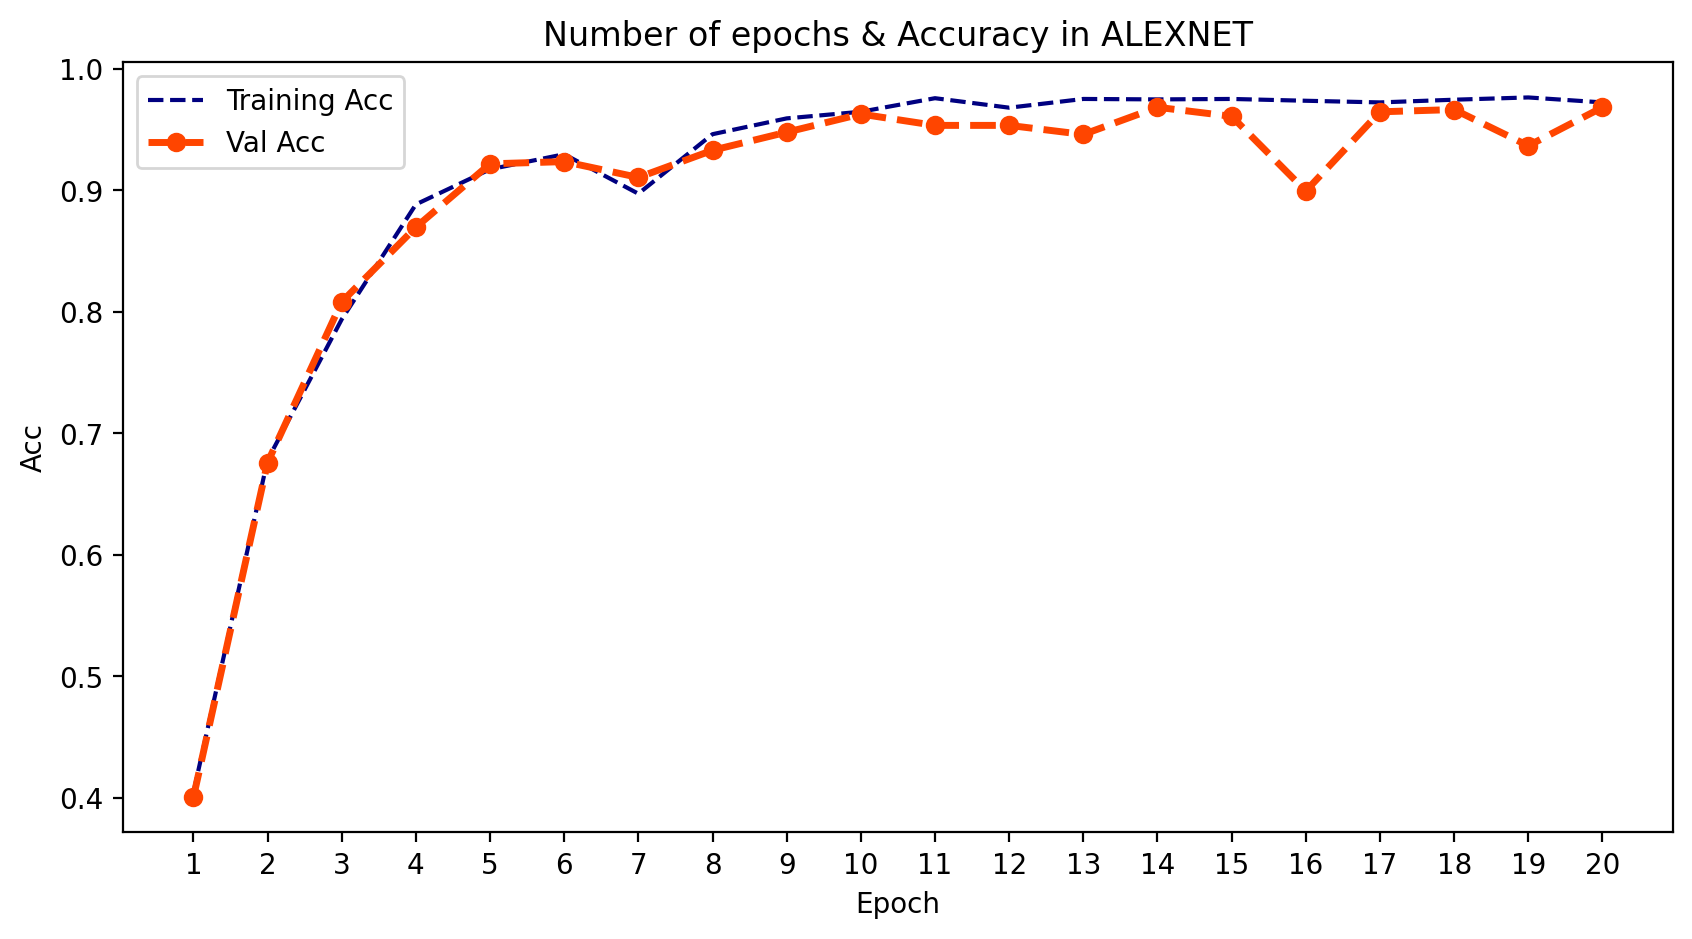

In [24]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

In [33]:
# Test the model
test_loss, test_acc = model_Alex.evaluate(testDataset)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

# Predict the model
y_pred = model_Alex.predict(testDataset)
y_pred = np.argmax(y_pred, axis=1)
y_true = testDataset.classes

# Calculate the F1, Precision, and Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print(classification_report(y_true, y_pred))

34/34 [==============================] - 10s 291ms/step - loss: 0.0471 - accuracy: 0.9693
Test Loss:  0.047103989869356155
Test Accuracy:  0.9692737460136414
34/34 [==============================] - 9s 275ms/step
F1 Score:  0.21360970603493026
Precision:  0.2135963477020484
Recall:  0.21368715083798884
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       423
           1       0.23      0.24      0.23       440
           2       0.20      0.20      0.20       433
           3       0.22      0.21      0.21       440
           4       0.22      0.21      0.21       412

    accuracy                           0.21      2148
   macro avg       0.21      0.21      0.21      2148
weighted avg       0.21      0.21      0.21      2148

